In [72]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

sr = 22050

origin_sig, origin_sr = librosa.load(r"E:\develop\shorts-video-mixer\project\discord\audio\video_keeper_@hyezzi0801__완소 퍼펙트 공주님들과 함께 디스코드 #discord챌린지 #QWER.mp3", sr=sr)

# sub_sig, sub_sr = librosa.load(r"E:\develop\shorts-video-mixer\project\discord\audio\video_keeper_@joyseoworld__공주님들 만나고 왔습니다 들어줘 나의 Discord #QWER #Discord #Discord챌린지.mp3", sr=sr)

sub_sig, sub_sr = librosa.load(r"E:\develop\shorts-video-mixer\project\discord\audio\video_keeper_@ddidduneverdie__ #QWER #QWER_Discord #discord챌린지.mp3", sr=sr)

sub_sig_len = sub_sig.shape[0]
sub_part_sig = sub_sig[int(sub_sig_len * 0.4) : int(sub_sig_len * 0.4) + sr * 3 ]

print(origin_sig.shape, sub_sr)




(549707,) 22050


Text(0.5, 1.0, 'Spectrogram (dB)')

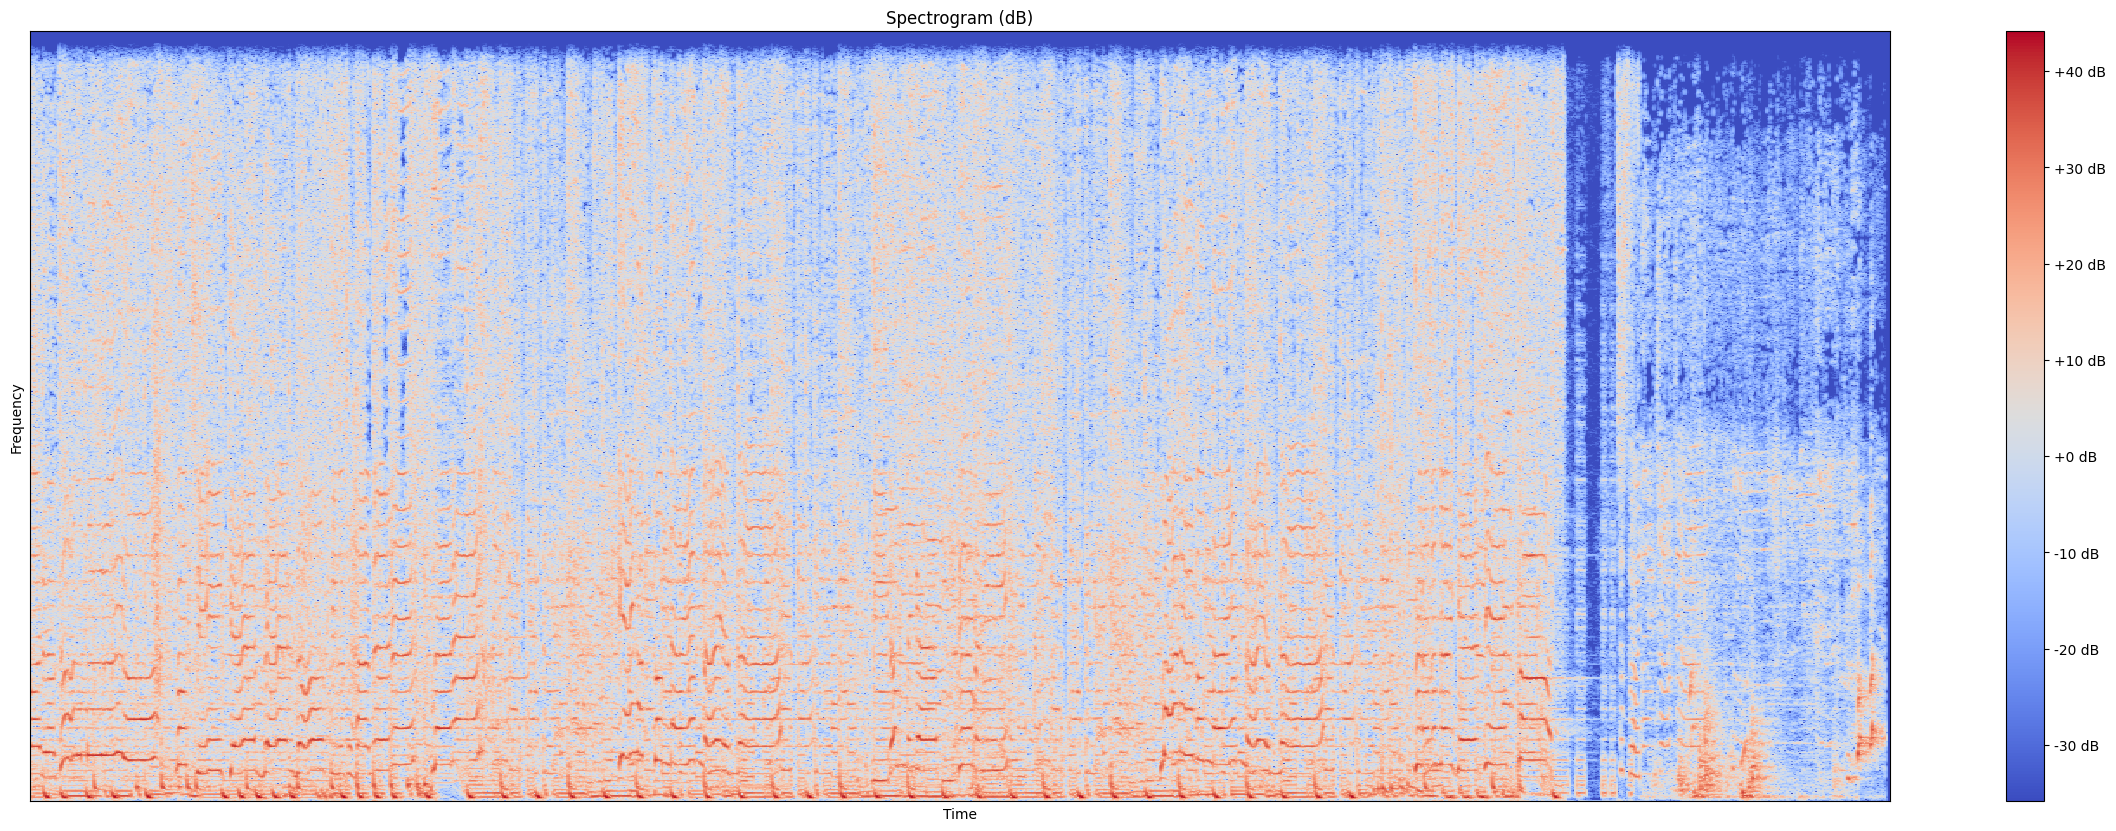

In [73]:
hop_length = 512
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(origin_sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
origin_magnitude = np.abs(stft)

# magnitude > Decibels
log_spectrogram = librosa.amplitude_to_db(origin_magnitude)

# display spectrogram
plt.figure(figsize=(30,10))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

Text(0.5, 1.0, 'Spectrogram (dB)')

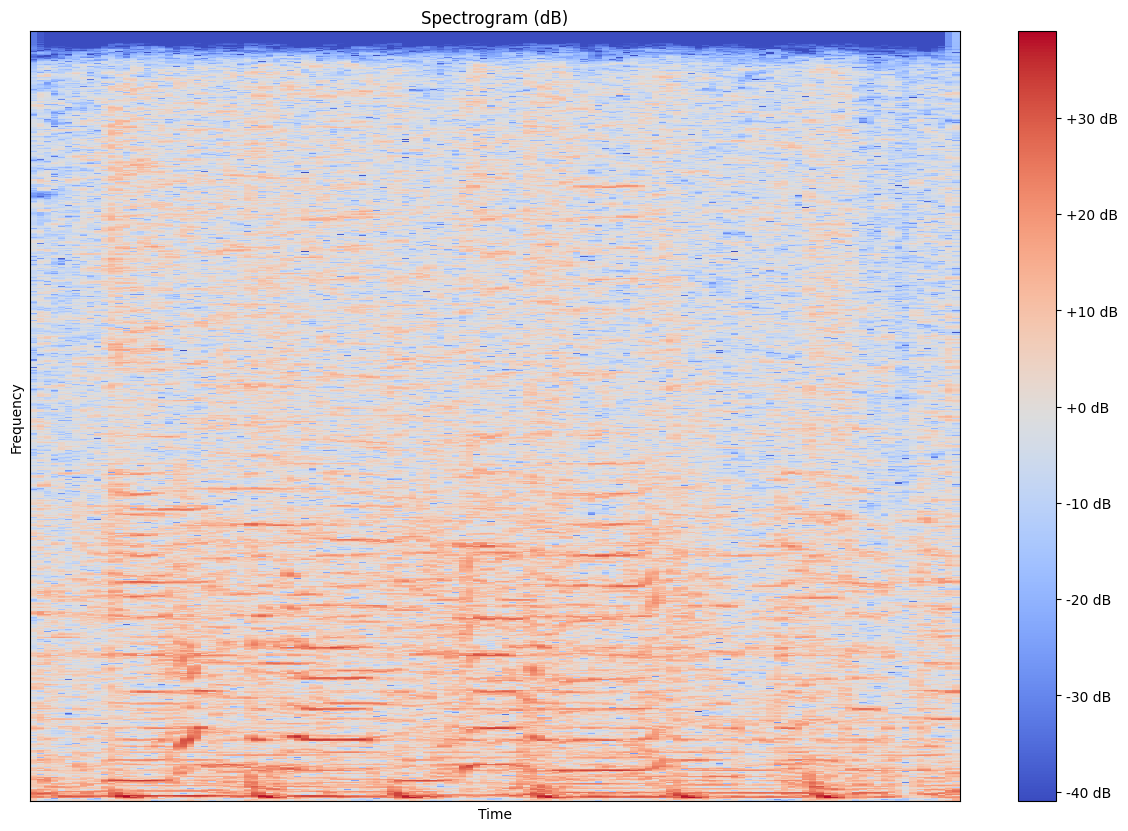

In [74]:
hop_length = 512
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sub_part_sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
sub_magnitude = np.abs(stft)

# magnitude > Decibels
log_spectrogram = librosa.amplitude_to_db(sub_magnitude)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

# 각 프레임의 peak를 찾아서 그래프로




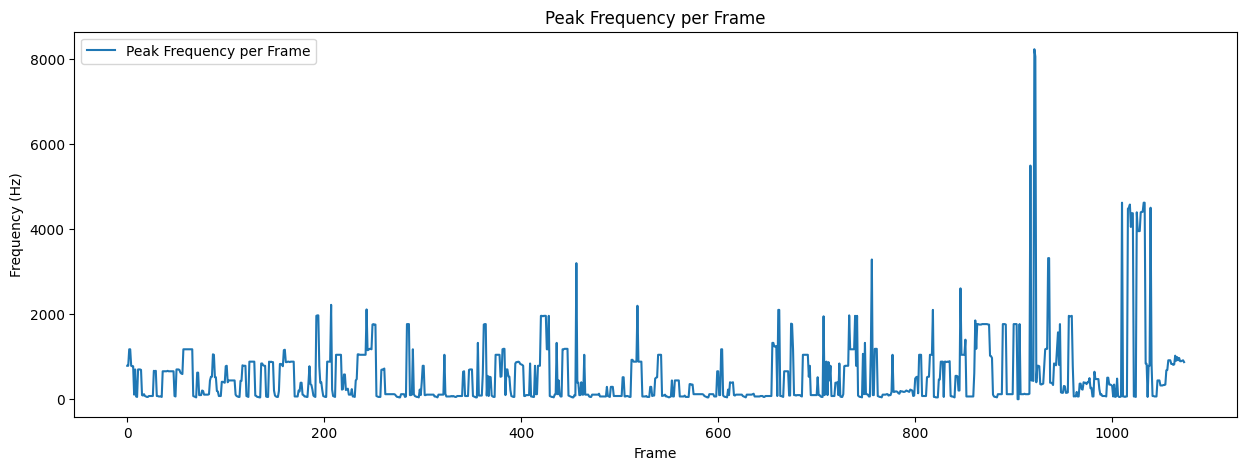

In [75]:
frequencies = np.fft.rfftfreq(n_fft, 1/sr)
origin_peak_freqs = []

for mag in origin_magnitude.T:
    peak_idx = np.argmax(mag)
    origin_peak_freqs.append(frequencies[peak_idx])

plt.figure(figsize=(15, 5))
plt.plot(origin_peak_freqs, label="Peak Frequency per Frame")
plt.xlabel("Frame")
plt.ylabel("Frequency (Hz)")
plt.title("Peak Frequency per Frame")
plt.legend()
plt.show()


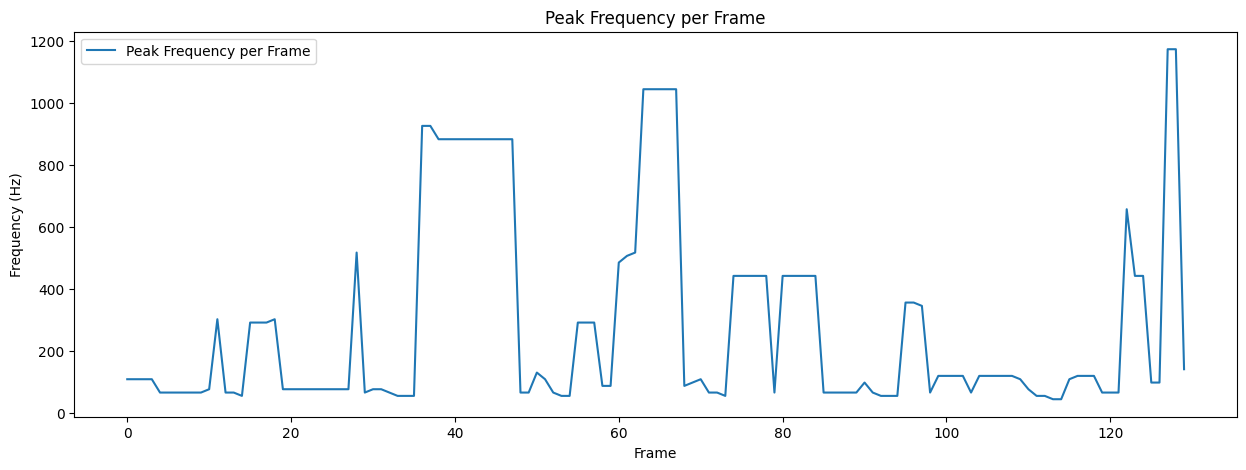

In [76]:
frequencies = np.fft.rfftfreq(n_fft, 1/sr)
sub_peak_freqs = []

for mag in sub_magnitude.T:
    peak_idx = np.argmax(mag)
    sub_peak_freqs.append(frequencies[peak_idx])

plt.figure(figsize=(15, 5))
plt.plot(sub_peak_freqs, label="Peak Frequency per Frame")
plt.xlabel("Frame")
plt.ylabel("Frequency (Hz)")
plt.title("Peak Frequency per Frame")
plt.legend()
plt.show()


In [77]:
from scipy.spatial.distance import euclidean

min_distance = float('inf')
best_offset = -1

for offset in range(0, len(origin_peak_freqs) - len(sub_peak_freqs)):

    sliced_origin_peak_freqs = origin_peak_freqs[offset: offset + len(sub_peak_freqs)]

    dist = euclidean(sliced_origin_peak_freqs, sub_peak_freqs)
    if dist < min_distance:
        min_distance = dist
        best_offset = offset
        print(best_offset, min_distance, "!!")

best_offset

0 5164.524532834599 !!
19 5101.0744754633815 !!
20 4892.149928377243 !!
21 4840.326876045437 !!
457 4734.56330481993 !!
471 4502.4094645814375 !!
472 3980.221986094127 !!
473 3744.0228038033774 !!
474 3642.597654806764 !!
475 2750.5664400291225 !!
476 2180.974403229831 !!


476

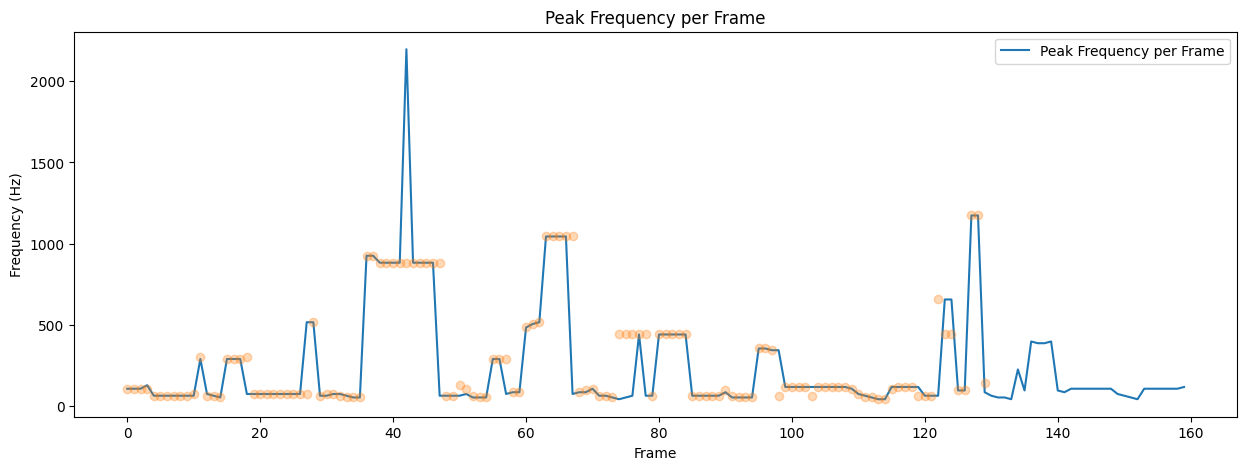

In [78]:
import numpy as np

new_sub_peak_freqs = [np.nan] * best_offset + sub_peak_freqs

plt.figure(figsize=(15, 5))
plt.plot(origin_peak_freqs[best_offset:best_offset + len(sub_peak_freqs) + 30], label="Peak Frequency per Frame")

# 점으로 표시
plt.plot(sub_peak_freqs, 'o' , alpha=0.3)

plt.xlabel("Frame")
plt.ylabel("Frequency (Hz)")
plt.title("Peak Frequency per Frame")
plt.legend()
plt.show()

In [84]:
origin_audio_duration = len(origin_sig) / sr
sub_audio_durtaion = len(sub_sig) / sr

sig_cnt_diff = best_offset * hop_length - int(sub_sig_len * 0.4)
duration_diff = sig_cnt_diff / sr


In [85]:
duration_diff

4.524716553287982

In [90]:
tempo , beat_frames = librosa.beat.beat_track(y=sub_sig,sr=sr )
print(beat_frames)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(tempo)
print(beat_times)

[  3  21  39  59  78  98 117 137 157 176 196 215 235 255 274 294 313 333
 352 372 392 411 431 450 470 490 509 528 545 563 583 602 622 641 661 680
 700]
[129.19921875]
[ 0.06965986  0.48761905  0.90557823  1.36997732  1.81115646  2.27555556
  2.71673469  3.18113379  3.64553288  4.08671202  4.55111111  4.99229025
  5.45668934  5.92108844  6.36226757  6.82666667  7.2678458   7.7322449
  8.17342404  8.63782313  9.10222222  9.54340136 10.00780045 10.44897959
 10.91337868 11.37777778 11.81895692 12.26013605 12.65487528 13.07283447
 13.53723356 13.9784127  14.44281179 14.88399093 15.34839002 15.78956916
 16.25396825]
